# Kwanza Tukule Data Analyst Assessment
## Section 1: Data Preparation and Cleaning
### 1.1) Data Quality Assessment - Data Undestanding and preparation
Before cleaning the dataset, we need to understand the dataset: for example, the dimensions of the dataset, the data type of each variable, perharps a peek at the first few rows and last rows of the data (to see what it looks like and confirm it matches our expectations), the name of each variable, etc

In [1]:
# importing the prerequisities
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Loading the dataset
df = pd.read_excel('../Downloads/Case Study Data - Read Only.xlsx')

In [3]:
# checking out the dimension of the dataset
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns')

There are 333405 rows and 7 columns


In [4]:
# checking the data types for each column'
df.dtypes

DATE                   datetime64[ns]
ANONYMIZED CATEGORY            object
ANONYMIZED PRODUCT             object
ANONYMIZED BUSINESS            object
ANONYMIZED LOCATION            object
QUANTITY                        int64
UNIT PRICE                    float64
dtype: object

In [5]:
# reading the first 5 rows 
df.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0


In [6]:
# reading the last 5 rows 
df.tail()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
333400,2024-01-09 20:49:00,Category-119,Product-e98d,Business-f9ff,Location-1979,1,1770.0
333401,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0
333402,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0
333403,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0
333404,2024-10-10 18:19:00,Category-75,Product-b31e,Business-2693,Location-b27b,1,4420.0


In [7]:
# Returning an array of column names
df.columns.values

array(['DATE', 'ANONYMIZED CATEGORY', 'ANONYMIZED PRODUCT',
       'ANONYMIZED BUSINESS', 'ANONYMIZED LOCATION', 'QUANTITY',
       'UNIT PRICE'], dtype=object)

In [8]:
# Returning a list of column names
df.columns.values.tolist()

['DATE',
 'ANONYMIZED CATEGORY',
 'ANONYMIZED PRODUCT',
 'ANONYMIZED BUSINESS',
 'ANONYMIZED LOCATION',
 'QUANTITY',
 'UNIT PRICE']

The data types match the expected data types for the columns. They are consistent.

In [10]:
# Checking the description of the data
df.describe(include="all")

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
count,333405,333405,333405,333405,333405,333405.000000,333397.000000
unique,NaN,46,820,4800,53,NaN,NaN
top,NaN,Category-120,Product-e805,Business-978e,Location-689f,NaN,NaN
freq,NaN,61666,25092,2622,44397,NaN,NaN
mean,2024-07-17 10:21:49.663381760,NaN,NaN,NaN,NaN,2.321186,2322.039538
min,2024-01-01 05:54:00,NaN,NaN,NaN,NaN,0.000000,0.000000
25%,2024-04-28 20:59:00,NaN,NaN,NaN,NaN,1.000000,1420.000000
50%,2024-07-28 17:18:00,NaN,NaN,NaN,NaN,1.000000,1840.000000
75%,2024-10-14 14:50:00,NaN,NaN,NaN,NaN,2.000000,2755.000000
max,2024-12-31 18:24:00,NaN,NaN,NaN,NaN,359.000000,16136.000000


There are 46 unique values in 'ANONYMIZED CATEGORY', 820 in 'ANONYMIZED PRODUCT', 4800 in 'ANONYMIZED BUSINESS' and 53 in 'ANONYMIZED LOCATION'.

 ### 1.2) Data Cleaning
#### 1.2.1) Checking for missing data


In [13]:
# checking for missing values
df.isnull().values.any()

True

There exist null values in the dataset. How many are they?

In [15]:
# checking how many missing values are in the dataset
print(f'There are {df.isnull().sum().sum()} missing values in the dataset')

There are 8 missing values in the dataset


In which column/s does the missing value originate from?

In [17]:
# checking from which column/s does the missing value originate from
df.isnull().sum()

DATE                   0
ANONYMIZED CATEGORY    0
ANONYMIZED PRODUCT     0
ANONYMIZED BUSINESS    0
ANONYMIZED LOCATION    0
QUANTITY               0
UNIT PRICE             8
dtype: int64

All the missing values are in the 'UNIT PRICE' column. Which rows?

In [19]:
# Ckecking the rows that contain the null values
df[df["UNIT PRICE"].isnull()]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
108112,2024-07-03 17:53:00,Category-94,Product-3d7f,Business-4fce,Location-f37d,2,NaN
150961,2024-12-16 18:33:00,Category-79,Product-dfc8,Business-8bbf,Location-3fc0,1,NaN
151142,2024-12-22 14:42:00,Category-122,Product-15e0,Business-c575,Location-1979,3,NaN
272379,2024-06-27 12:15:00,Category-92,Product-ccbc,Business-14b6,Location-1979,1,NaN
278284,2024-08-14 21:09:00,Category-101,Product-84a5,Business-4be1,Location-bb69,21,NaN
278384,2024-12-30 14:17:00,Category-95,Product-15f3,Business-1a74,Location-f37d,1,NaN
310385,2024-03-31 14:03:00,Category-114,Product-9204,Business-c9dc,Location-689f,1,NaN
327152,2024-08-13 16:20:00,Category-107,Product-7eed,Business-0d61,Location-1ba8,1,NaN


rows number 108112, 150961, 151142, 272379, 278284, 278384, 310385, and 327152 have missing values.

In [21]:
# We will drop the rows with missing data since we cannot replace null with 0 in the current situation.
no_missing_data = df.dropna()

In [22]:
# reseting the index back to 0
no_missing_data = no_missing_data.reset_index(drop=True)

In [23]:
print(f'The rows with missing data have been dropped and {no_missing_data.shape[0]} are remaining')

The rows with missing data have been dropped and 333397 are remaining


### 1.2.2) Removing duplicates

In [25]:
# checking for missing values
no_missing_data.duplicated().any()

True

There exist duplicate values in the dataset. How many are they?

In [27]:
print(f'There are {no_missing_data.duplicated().sum()} duplicated rows')

There are 3524 duplicated rows


In [28]:
# Ckecking the rows that contain the duplicate values
no_missing_data[no_missing_data["UNIT PRICE"].duplicated()]

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
5,2024-08-18 21:32:00,Category-76,Product-6e9c,Business-de42,Location-1ba8,1,2605.0
39,2024-11-03 15:58:00,Category-98,Product-bd79,Business-1510,Location-4ea1,1,1940.0
46,2024-04-12 15:53:00,Category-91,Product-32b3,Business-926b,Location-d32a,2,640.0
62,2024-03-22 19:41:00,Category-119,Product-66e0,Business-74f4,Location-689f,2,1480.0
63,2024-12-05 20:25:00,Category-94,Product-77bc,Business-77a2,Location-3fc0,1,575.0
...,...,...,...,...,...,...,...
333392,2024-01-09 20:49:00,Category-119,Product-e98d,Business-f9ff,Location-1979,1,1770.0
333393,2024-08-20 20:24:00,Category-106,Product-21f4,Business-72bc,Location-689f,1,850.0
333394,2024-08-20 20:24:00,Category-76,Product-6e9c,Business-72bc,Location-689f,1,2575.0
333395,2024-10-10 18:19:00,Category-91,Product-523e,Business-2693,Location-b27b,1,1520.0


Above are the duplicated rows

In [30]:
# We need to drop the duplicates from the data
clean_data = no_missing_data.drop_duplicates()

In [32]:
# reseting the index back to 0
clean_data = clean_data.reset_index(drop=True)

In [33]:
# A rondom sample of 10 rows
clean_data.sample(n=10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE
136524,2024-09-12 21:31:00,Category-120,Product-4156,Business-3bf0,Location-66f4,1,1890.0
121814,2024-11-27 21:13:00,Category-94,Product-12ad,Business-6011,Location-e2f8,1,460.0
228905,2024-10-30 21:42:00,Category-99,Product-64fa,Business-a197,Location-66f4,1,1300.0
176745,2024-08-11 15:34:00,Category-119,Product-66e0,Business-5d3e,Location-1979,7,1480.0
123125,2024-08-21 20:56:00,Category-75,Product-086d,Business-31b8,Location-03fc,6,2200.0
305607,2024-12-10 18:01:00,Category-92,Product-d09a,Business-ed1e,Location-3fc0,1,1520.0
76423,2024-05-24 14:08:00,Category-83,Product-5a14,Business-4cad,Location-f37d,1,340.0
78353,2024-12-11 12:32:00,Category-85,Product-0cdd,Business-9b3a,Location-689f,2,3785.0
12735,2024-12-30 15:50:00,Category-115,Product-b8e1,Business-37bc,Location-f37d,1,3100.0
251657,2024-08-25 17:43:00,Category-100,Product-10cb,Business-b0f5,Location-c2f2,1,1490.0


### 1.3 Feature Engineering

In [35]:
# Splitting the Date column to Month-Year column
clean_data['Month-Year'] = clean_data['DATE'].dt.strftime('%B %Y')

In [36]:
# A rondom sample of 10 rows
clean_data.sample(n=10)

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year
258460,2024-10-28 21:46:00,Category-106,Product-b576,Business-281c,Location-e2f8,1,1290.0,October 2024
266370,2024-08-26 14:23:00,Category-75,Product-2175,Business-c1e3,Location-7f37,4,4360.0,August 2024
107018,2024-08-05 19:32:00,Category-106,Product-b576,Business-3280,Location-3e32,1,1300.0,August 2024
180595,2024-10-28 09:35:00,Category-119,Product-7940,Business-2e0c,Location-8959,1,1390.0,October 2024
163787,2024-08-28 08:02:00,Category-100,Product-2efc,Business-61e9,Location-f7fa,1,1450.0,August 2024
310120,2024-11-06 18:40:00,Category-75,Product-8f75,Business-fe46,Location-3e32,2,4670.0,November 2024
224469,2024-03-12 12:23:00,Category-110,Product-5f71,Business-6a2b,Location-128a,1,420.0,March 2024
294563,2024-10-24 17:28:00,Category-108,Product-ee77,Business-8f86,Location-1979,10,140.0,October 2024
79413,2024-06-11 20:13:00,Category-91,Product-e125,Business-a3fe,Location-4ea1,1,1550.0,June 2024
322999,2024-11-04 20:28:00,Category-110,Product-7316,Business-1548,Location-f37d,1,260.0,November 2024


## Section 2: Exploratory Data Analysis
### Univariate Data Analysis

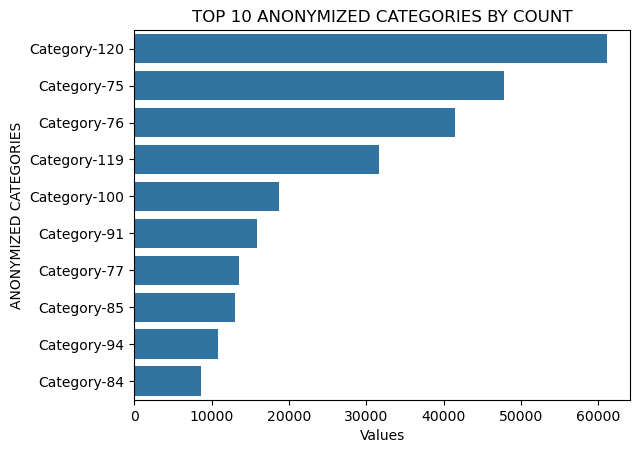

In [61]:
# Anonymized Product column
sns.countplot(y='ANONYMIZED CATEGORY', data = clean_data,
               order=clean_data['ANONYMIZED CATEGORY'].value_counts().index[:10])

# Adding labels and title
plt.title("TOP 10 ANONYMIZED CATEGORIES BY COUNT")
plt.xlabel('Values')
plt.ylabel('ANONYMIZED CATEGORIES')

# Display the plot
plt.show()

Category - 120 is the most frequent category.

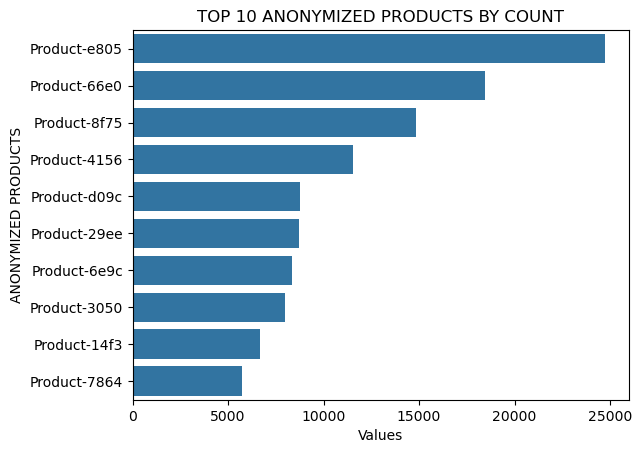

In [63]:
# Anonymized Product column
sns.countplot(y='ANONYMIZED PRODUCT', data = clean_data,
               order=clean_data['ANONYMIZED PRODUCT'].value_counts().index[:10])

# Adding labels and title
plt.title("TOP 10 ANONYMIZED PRODUCTS BY COUNT")
plt.xlabel('Values')
plt.ylabel('ANONYMIZED PRODUCTS')

# Display the plot
plt.show()

PRODUCT-e805 is the most frequent product.

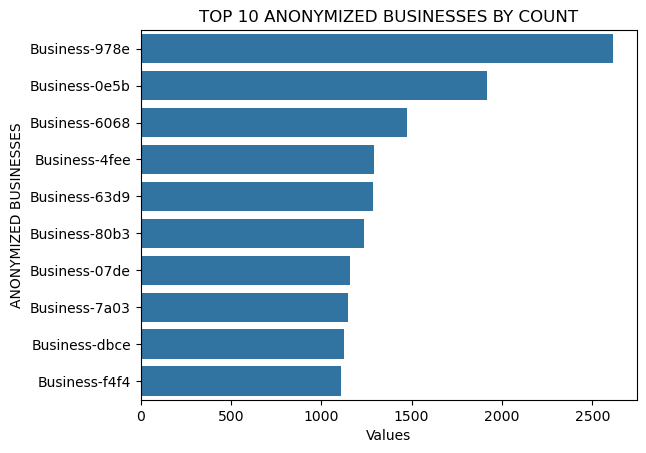

In [65]:
# Anonymized Business column
sns.countplot(y= 'ANONYMIZED BUSINESS', data=clean_data,
             order= clean_data["ANONYMIZED BUSINESS"].value_counts().index[:10])

# Adding labels and title
plt.title('TOP 10 ANONYMIZED BUSINESSES BY COUNT')
plt.xlabel('Values')
plt.ylabel('ANONYMIZED BUSINESSES')

# Display the plot
plt.show()

BUSINESS-978e is the most frequent business

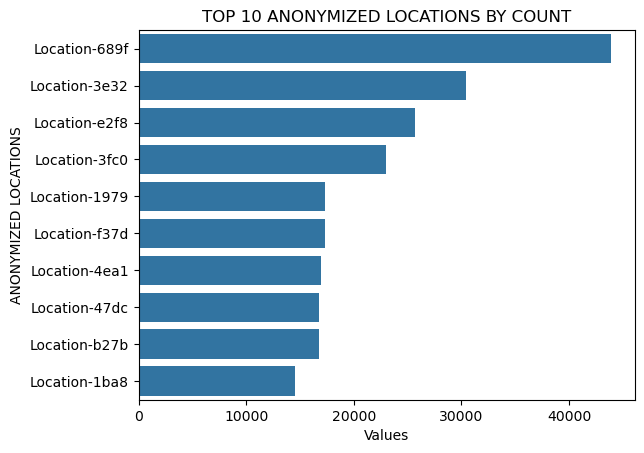

In [68]:
# Anonymized Location column
sns.countplot(y = "ANONYMIZED LOCATION", data= clean_data,
             order=clean_data["ANONYMIZED LOCATION"].value_counts().index[:10])

# Adding labels and title
plt.title('TOP 10 ANONYMIZED LOCATIONS BY COUNT')
plt.xlabel('Values')
plt.ylabel('ANONYMIZED LOCATIONS')

# Display the plot
plt.show()

Location-689f is the most frequent location.

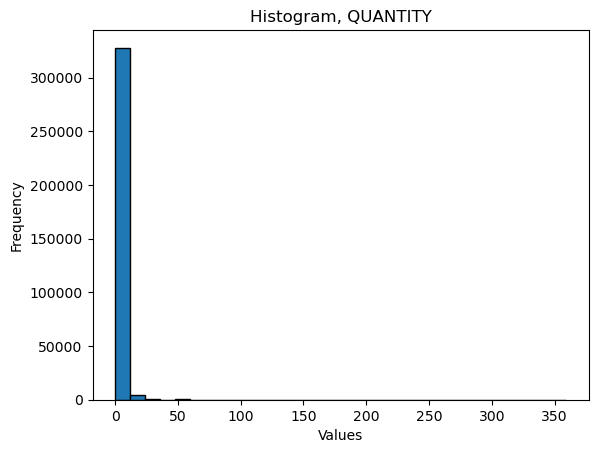

In [71]:
# Quantity column
plt.hist(df['QUANTITY'], bins=30, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram, QUANTITY')
 
# Display the plot
plt.show()

The 'QUANTITY' column is skewed to the left.

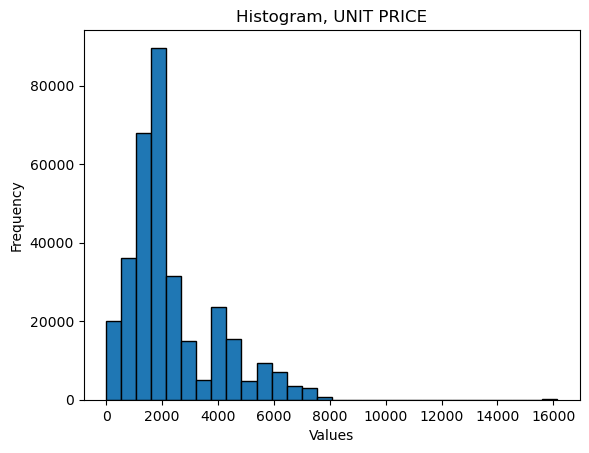

In [75]:
# Unit Price column
plt.hist(df['UNIT PRICE'], bins=30, edgecolor='black')

# Adding labels and title
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram, UNIT PRICE')
 
# Display the plot
plt.show()

The 'UNIT PRICE' column is skewed to the left.

### 2.2 Sales Overview:
#### 2.2.1 Calculate total Quantity and Value grouped by Anonymized Category

In [80]:
# Getting the total value
clean_data['Total Value'] = clean_data['QUANTITY'] * clean_data['UNIT PRICE']
clean_data.head()

,DATE,ANONYMIZED CATEGORY,ANONYMIZED PRODUCT,ANONYMIZED BUSINESS,ANONYMIZED LOCATION,QUANTITY,UNIT PRICE,Month-Year,Total Value
0,2024-08-18 21:32:00,Category-106,Product-21f4,Business-de42,Location-1ba8,1,850.0,August 2024,850.0
1,2024-08-18 21:32:00,Category-120,Product-4156,Business-de42,Location-1ba8,2,1910.0,August 2024,3820.0
2,2024-08-18 21:32:00,Category-121,Product-49bd,Business-de42,Location-1ba8,1,3670.0,August 2024,3670.0
3,2024-08-18 21:32:00,Category-76,Product-61dd,Business-de42,Location-1ba8,1,2605.0,August 2024,2605.0
4,2024-08-18 21:32:00,Category-119,Product-66e0,Business-de42,Location-1ba8,5,1480.0,August 2024,7400.0


In [82]:
# Calculating Total Quantity and Value groupedby "ANONYMIZED CATEGORY"
category_vs_quantity_price = clean_data.groupby("ANONYMIZED CATEGORY").agg(Total_Quantity=("QUANTITY", "sum"),
                                                                           Total_Value=("Total Value","sum"))
print(category_vs_quantity_price)

                     Total_Quantity  Total_Value
ANONYMIZED CATEGORY                             
Category-100                  76824  134902751.0
Category-101                  19564   35577822.0
Category-102                   1786     464463.0
Category-104                   1217    1557598.0
Category-105                   1579    2690719.0
Category-106                   6521    5932763.0
Category-107                   2729    4170797.0
Category-108                   9756    5101375.0
Category-109                   1446    1263226.0
Category-110                  10529    5483386.0
Category-111                   6715    4387343.0
Category-113                    741    1254083.0
Category-114                      3       8600.0
Category-115                    348     425360.0
Category-116                    856     422745.0
Category-117                      5       1550.0
Category-118                     21       7560.0
Category-119                  68332  103454819.0
Category-120        

#### 2.2.1 Calculate total Quantity and Value grouped by Anonymized Business

In [85]:
# Calculating Total Quantity and Value groupedby "ANONYMIZED BUSINESS"
business_vs_quantity_price = clean_data.groupby("ANONYMIZED BUSINESS").agg(Total_Quantity=("QUANTITY", "sum"),
                                                                           Total_Value=("Total Value","sum"))
print(business_vs_quantity_price)

                     Total_Quantity  Total_Value
ANONYMIZED BUSINESS                             
Business-0000                     8      10445.0
Business-0005                     1       2645.0
Business-0029                    26      77340.0
Business-003d                    98     221761.0
Business-0072                   127     225056.0
...                             ...          ...
Business-ffa9                     3       6740.0
Business-ffae                     6      10530.0
Business-ffb1                   266     438115.0
Business-ffd2                    37      67723.0
Business-ffff                   110     110285.0

[4800 rows x 2 columns]


### 2.3 Provide visualizations (e.g., bar charts or tables) to support your findings.

#### 2.3.1 Visualisation for Total Quantity and Value groupedby "ANONYMIZED CATEGORY"

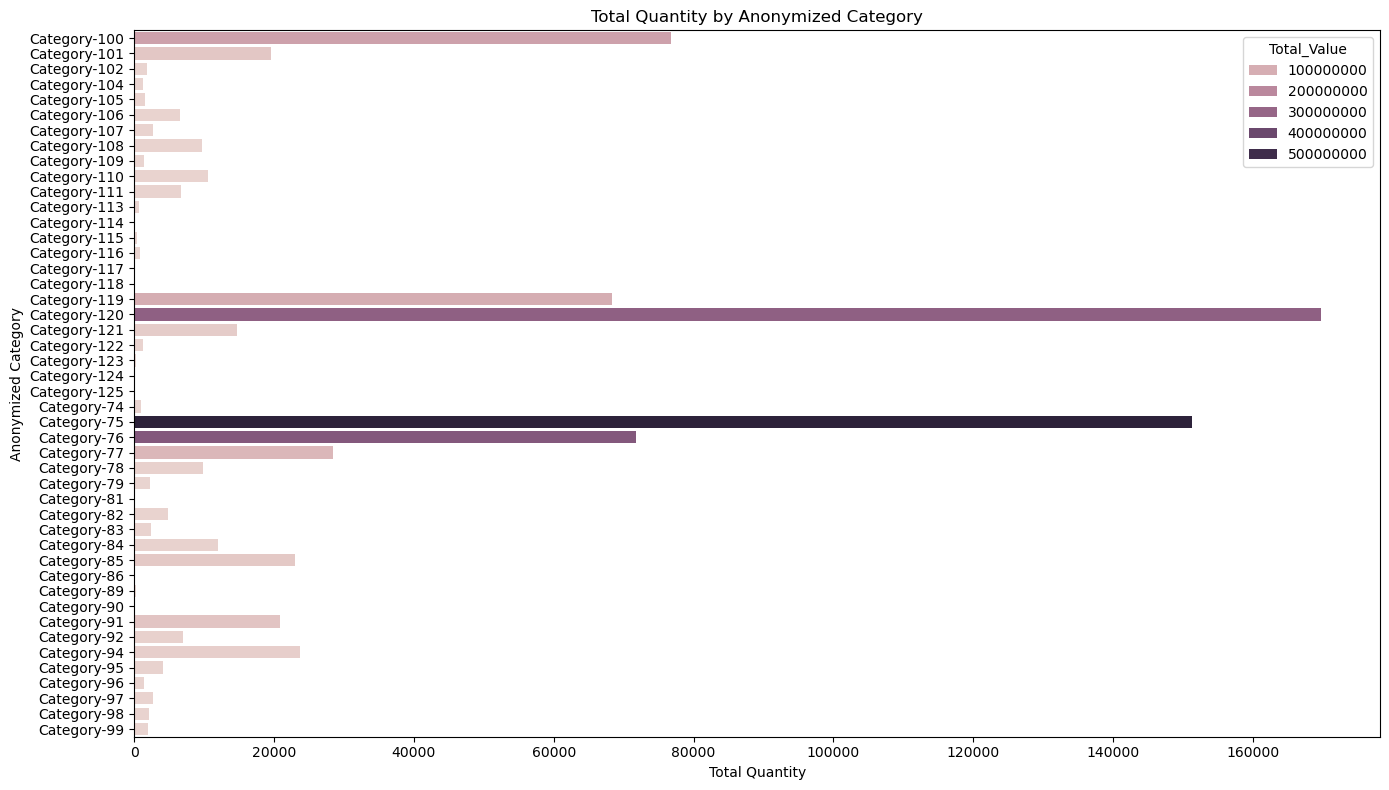

In [89]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for Total Quantity
sns.barplot(x='Total_Quantity', y='ANONYMIZED CATEGORY', hue="Total_Value", data=category_vs_quantity_price)
plt.title('Total Quantity by Anonymized Category')
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Category')

# Display the plots
plt.tight_layout()
plt.show()

Category-75 is the highest in terms of Total Value and second to Category 120 in terms of Total Quantity

#### 2.3.2 Visualisation for Total Quantity and Value groupedby "ANONYMIZED BUSINESS"

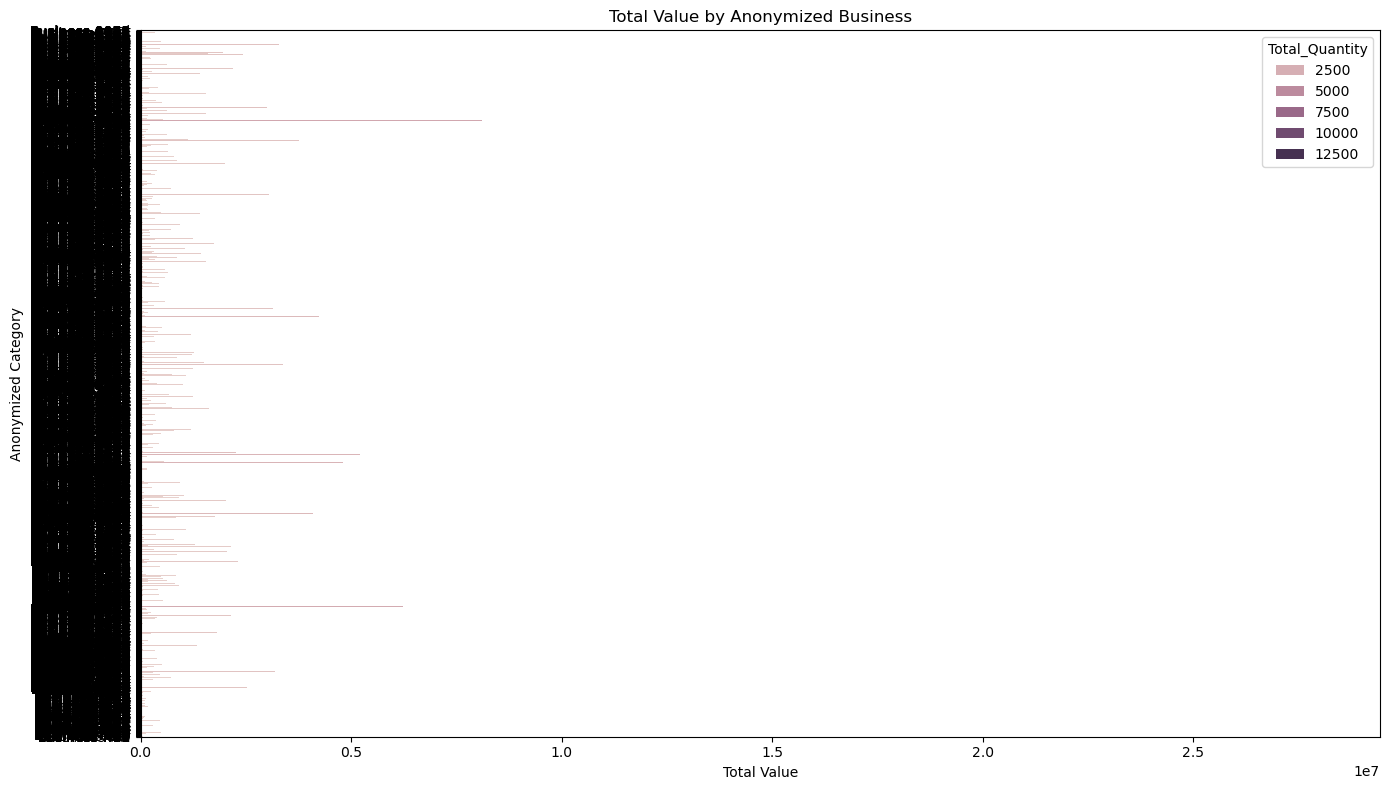

In [92]:
# Set the figure size
plt.figure(figsize=(14, 8))

# Create a bar plot for Total Value
sns.barplot(x='Total_Value', y='ANONYMIZED BUSINESS', hue="Total_Quantity" , data=business_vs_quantity_price)
plt.title('Total Value by Anonymized Business')
plt.xlabel('Total Value')
plt.ylabel('Anonymized Category')

# Display the plots
plt.tight_layout()
plt.show()

In [94]:
# A table format to represent the data on Anonymized business since the visual is clattered on the y-axis
print(business_vs_quantity_price)

                     Total_Quantity  Total_Value
ANONYMIZED BUSINESS                             
Business-0000                     8      10445.0
Business-0005                     1       2645.0
Business-0029                    26      77340.0
Business-003d                    98     221761.0
Business-0072                   127     225056.0
...                             ...          ...
Business-ffa9                     3       6740.0
Business-ffae                     6      10530.0
Business-ffb1                   266     438115.0
Business-ffd2                    37      67723.0
Business-ffff                   110     110285.0

[4800 rows x 2 columns]


Displaying 4800 rows has become cumbersome, we will filter and visualise the top 20 Anonymized business to focus on the most valuable businesses.

In [96]:
# Sort by Total_Value in descending order
business_vs_quantity_price_sorted = business_vs_quantity_price.sort_values(by='Total_Value', ascending=False)

# Select the top 20 businesses for visualization
top_businesses = business_vs_quantity_price_sorted.head(20)

C:\Users\Dynoh\AppData\Local\Temp\ipykernel_15316\10148703.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Value', y='ANONYMIZED BUSINESS', data=top_businesses, palette='viridis')
C:\Users\Dynoh\AppData\Local\Temp\ipykernel_15316\10148703.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Total_Quantity', y='ANONYMIZED BUSINESS', data=top_businesses, palette='plasma')


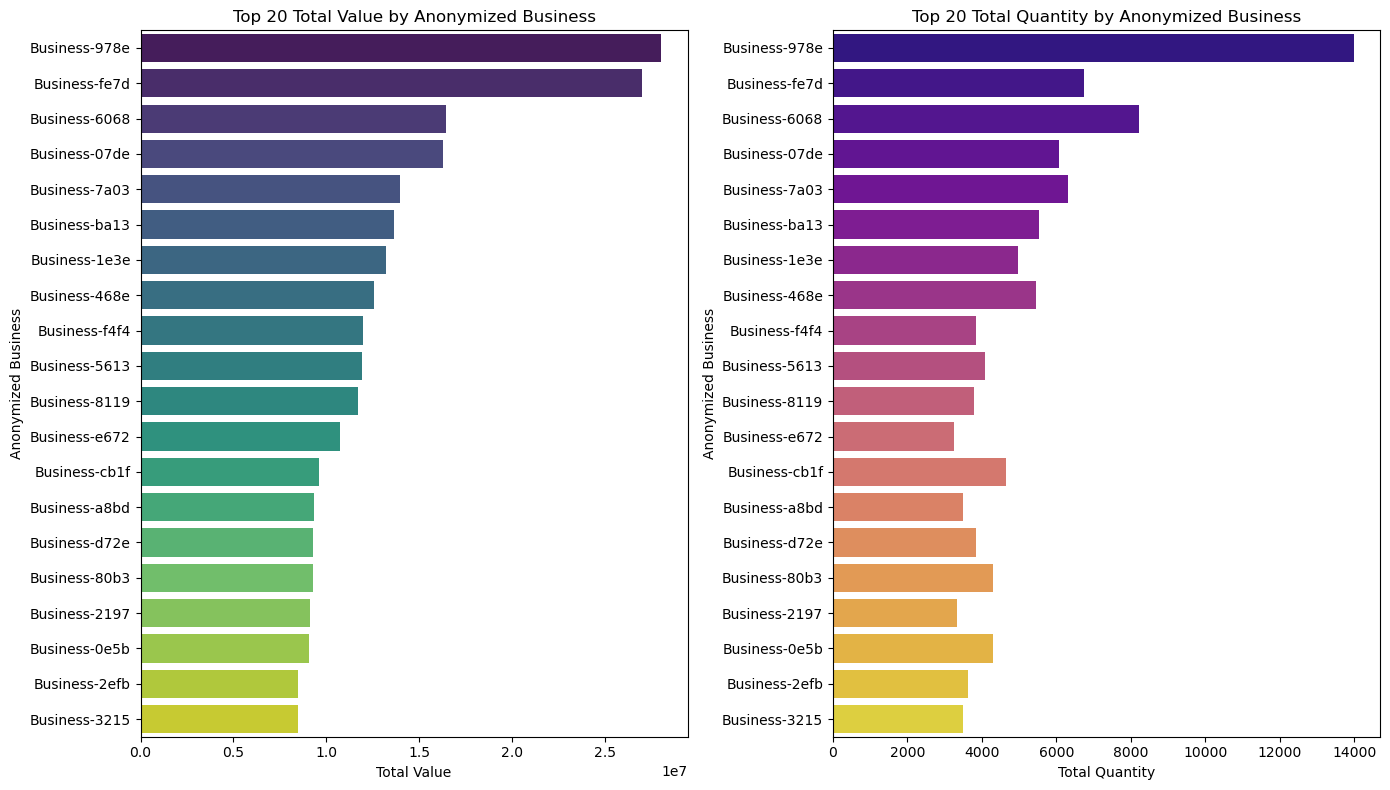

In [97]:
# Setting the figure size for better readability
plt.figure(figsize=(14, 8))

# Creating a bar plot for Total Value by Anonymized Business
plt.subplot(1, 2, 1)  # 1 row, 2 columns, first subplot
sns.barplot(x='Total_Value', y='ANONYMIZED BUSINESS', data=top_businesses, palette='viridis')
plt.title('Top 20 Total Value by Anonymized Business')
plt.xlabel('Total Value')
plt.ylabel('Anonymized Business')

# Create a bar plot for Total Quantity by Anonymized Business
plt.subplot(1, 2, 2)  # 1 row, 2 columns, second subplot
sns.barplot(x='Total_Quantity', y='ANONYMIZED BUSINESS', data=top_businesses, palette='plasma')
plt.title('Top 20 Total Quantity by Anonymized Business')
plt.xlabel('Total Quantity')
plt.ylabel('Anonymized Business')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

### 2.4 Trends Over Time: 
Analyze sales trends (Value and Quantity) by Month-Year. 
Create a time series plot to show seasonal patterns or changes in sales performance.

In [99]:
# Making sure that the Month-Year column is in datetime datatype
clean_data['Month-Year'] = pd.to_datetime(clean_data['Month-Year'], format= "%B %Y")

In [100]:
# Group by 'Month-Year' and aggregate
sales_trends = clean_data.groupby('Month-Year').agg(Total_Value=('Total Value', 'sum'), 
                                                    total_quantity=('QUANTITY', 'sum')).reset_index()

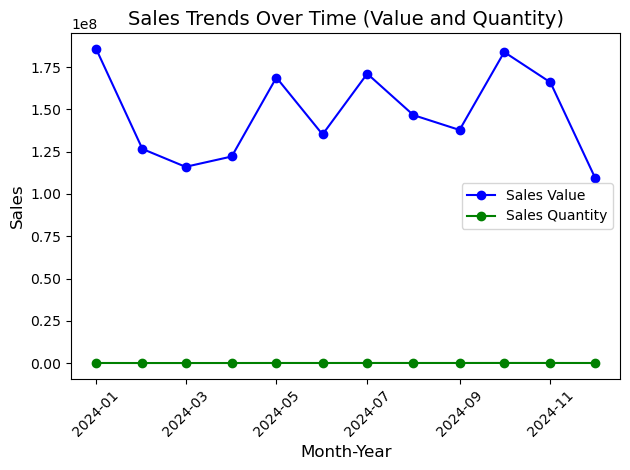

In [101]:
plt.plot(sales_trends['Month-Year'], sales_trends['Total_Value'], label='Sales Value', color='blue', marker='o')
plt.plot(sales_trends['Month-Year'], sales_trends['total_quantity'], label='Sales Quantity', color='green', marker='o')

# Add labels and title
plt.title('Sales Trends Over Time (Value and Quantity)', fontsize=14)
plt.xlabel('Month-Year', fontsize=12)
plt.ylabel('Sales', fontsize=12)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Add a legend
plt.legend()

# Display the plot
plt.tight_layout()
plt.show()

### 2.5 Performance Analysis

#### 2.5.1 Identify the top 5 most frequently purchased products (based on Quantity).

In [104]:
# groupby the products by quantity
top_products = clean_data.groupby('ANONYMIZED PRODUCT')['QUANTITY'].sum().reset_index()
print(top_products)

    ANONYMIZED PRODUCT  QUANTITY
0         Product-0001       286
1         Product-0031        49
2         Product-004f         8
3         Product-02e4       225
4         Product-031c      1237
..                 ...       ...
812       Product-fee0        42
813       Product-ff72        11
814       Product-ff95      2297
815       Product-ffa6        31
816       Product-ffb7         3

[817 rows x 2 columns]


In [105]:
# sort the products by 'QUANTITY' in descending order
top_products_sorted = top_products.sort_values(by="QUANTITY", ascending=False)
print(top_products_sorted)

    ANONYMIZED PRODUCT  QUANTITY
338       Product-66e0     46957
750       Product-e805     42602
476       Product-8f75     37566
127       Product-29ee     35940
213       Product-4156     28487
..                 ...       ...
189       Product-3bcd         1
691       Product-d536         1
513       Product-9a4e         1
153       Product-317b         1
731       Product-e0cc         1

[817 rows x 2 columns]


In [106]:
# selecting the top 5 products
top_5_products = top_products_sorted.head(5)
print(top_5_products)

    ANONYMIZED PRODUCT  QUANTITY
338       Product-66e0     46957
750       Product-e805     42602
476       Product-8f75     37566
127       Product-29ee     35940
213       Product-4156     28487


Product-66e0, Product-e805, Product-8f75, Product-29ee, and Product-4156 are the top 5 products by quantity, respectively

#### 2.5.2 Identify the top 5 most valuable products (based on Value).

In [109]:
# groupby the products by value
top_products_by_value = clean_data.groupby('ANONYMIZED PRODUCT')['Total Value'].sum().reset_index()
print(top_products_by_value)

    ANONYMIZED PRODUCT  Total Value
0         Product-0001     730730.0
1         Product-0031      85554.0
2         Product-004f      39040.0
3         Product-02e4      58620.0
4         Product-031c    2404010.0
..                 ...          ...
812       Product-fee0     173817.0
813       Product-ff72      21120.0
814       Product-ff95    3872450.0
815       Product-ffa6      83840.0
816       Product-ffb7       1120.0

[817 rows x 2 columns]


In [110]:
# sort the products by 'UNIT PRICE' in descending order
top_products_by_value_sorted = top_products_by_value.sort_values(by="Total Value", ascending=False)
print(top_products_by_value_sorted)

    ANONYMIZED PRODUCT  Total Value
750       Product-e805  262787281.0
476       Product-8f75  158797460.0
338       Product-66e0   70704225.0
127       Product-29ee   68248274.0
213       Product-4156   56956007.0
..                 ...          ...
201       Product-3dcf          0.0
288       Product-5793          0.0
173       Product-38e9          0.0
241       Product-482b          0.0
639       Product-c1d6          0.0

[817 rows x 2 columns]


In [111]:
# selecting the top 5 products
top_products_by_value_sorted = top_products_by_value_sorted.head(5)
print(top_products_by_value_sorted)

    ANONYMIZED PRODUCT  Total Value
750       Product-e805  262787281.0
476       Product-8f75  158797460.0
338       Product-66e0   70704225.0
127       Product-29ee   68248274.0
213       Product-4156   56956007.0


Product-e805, Product-8f75, Product-66e0, Product-29ee, and Product-4156 are the top 5 products by value, respectively.

## Section 3: Advanced Analysis
### 3.1 Customer Segmentation
Perform a segmentation analysis of businesses (Anonymized Business) based on their purchasing behavior:
- Total Quantity purchased
- Total Value contributed
- Frequency of transactions

We will use a clustering algorithmn, K-means clustering, to segment the businesses based on purchase behavior and determine the optimal number of clusters using the elbow method. Therefore, we need to follow the steps highlighted below:-
#### 3.1.1 Preparing the data

In [115]:
# Aggregate the data by business
business_summary = clean_data.groupby('ANONYMIZED BUSINESS').agg(TOTAL_QUANTITY=('QUANTITY', 'sum'),
                                                                 TOTAL_VALUE=('Total Value', 'sum'),
                                                                 FREQUENCY=('DATE', 'count')).reset_index()

#### 3.1.2 Standardise the Data

In [117]:
# Stanadardise the data to ensure all variales are on the same scale to perform segmenation
# We are using z-scores for achieve standardization
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
business_summary_scaled = scaler.fit_transform(business_summary[['TOTAL_QUANTITY', 'TOTAL_VALUE', 'FREQUENCY']])

#### 3.1.3 Perform Clustering

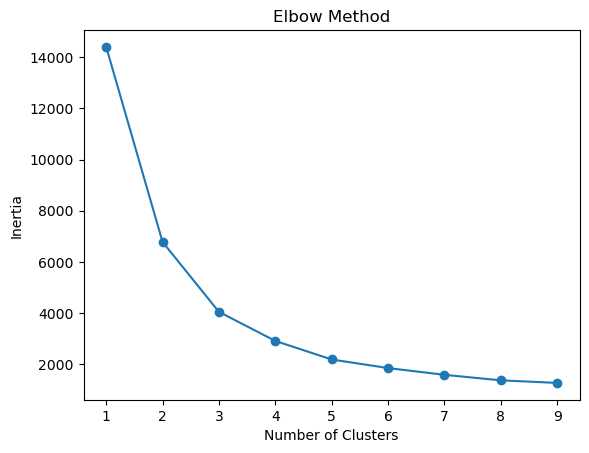

In [119]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Elbow method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(business_summary_scaled)
    inertia.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [120]:
# Fitting K-Means with the optimal number of clusters, that is, 3.
kmeans = KMeans(n_clusters=3, random_state=42)
business_summary['CLUSTER'] = kmeans.fit_predict(business_summary_scaled)

#### 3.1.4 Analyze the Segments
After clusteing, we will analyze the characteristic of each segment to understand purchase behaviour.

In [122]:
# Analyze clusters
cluster_analysis = business_summary.groupby('CLUSTER').agg(
    AVG_QUANTITY=('TOTAL_QUANTITY', 'mean'),
    AVG_VALUE=('TOTAL_VALUE', 'mean'),
    AVG_FREQUENCY=('FREQUENCY', 'mean'),
    COUNT=('ANONYMIZED BUSINESS', 'count')
).reset_index()

print(cluster_analysis)

   CLUSTER  AVG_QUANTITY     AVG_VALUE  AVG_FREQUENCY  COUNT
0        0     71.135286  1.543522e+05      37.097048   4472
1        1   4896.000000  1.234302e+07     922.956522     23
2        2   1098.573770  2.605973e+06     468.022951    305


We now have insights of the average purchasing behavior of business in each cluster
- high-value, high-frequency customers.
- low-value, infrequent customers.
- moderate-value, moderate-frequency customers.

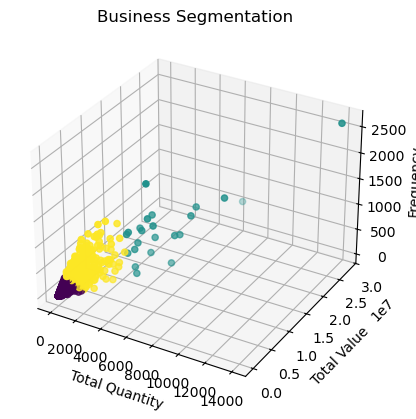

In [124]:
from mpl_toolkits.mplot3d import Axes3D

# 3D Scatter Plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(
    business_summary['TOTAL_QUANTITY'],
    business_summary['TOTAL_VALUE'],
    business_summary['FREQUENCY'],
    c=business_summary['CLUSTER'], cmap='viridis'
)
ax.set_xlabel('Total Quantity')
ax.set_ylabel('Total Value')
ax.set_zlabel('Frequency')
plt.title('Business Segmentation')
plt.show()

In [125]:
#### 3.1.5 Displaying the results in a table
business_summary

,ANONYMIZED BUSINESS,TOTAL_QUANTITY,TOTAL_VALUE,FREQUENCY,CLUSTER
0,Business-0000,8,10445.0,8,0
1,Business-0005,1,2645.0,1,0
2,Business-0029,26,77340.0,6,0
3,Business-003d,98,221761.0,31,0
4,Business-0072,127,225056.0,101,0
...,...,...,...,...,...
4795,Business-ffa9,3,6740.0,3,0
4796,Business-ffae,6,10530.0,5,0
4797,Business-ffb1,266,438115.0,105,0
4798,Business-ffd2,37,67723.0,22,0


### 3.2 Classify businesses into 3 groups (e.g., High Value, Medium Value, Low Value) 

In [127]:
# Defining the thresholds
quantiles = business_summary['TOTAL_VALUE'].quantile([0.4, 0.8])
low_threshold = quantiles[0.4]
high_threshold = quantiles[0.8]

# Classifing the businesses
def classify_business(row):
    if row['TOTAL_VALUE'] >= high_threshold:
        return 'High Value'
    elif row['TOTAL_VALUE'] >= low_threshold:
        return 'Medium Value'
    else:
        return 'Low Value'

business_summary['VALUE_GROUP'] = business_summary.apply(classify_business, axis=1)

In [128]:
# printing the top 5 rows to see the changes in the new column "VALUE GROUP"
business_summary.head()

,ANONYMIZED BUSINESS,TOTAL_QUANTITY,TOTAL_VALUE,FREQUENCY,CLUSTER,VALUE_GROUP
0,Business-0000,8,10445.0,8,0,Low Value
1,Business-0005,1,2645.0,1,0,Low Value
2,Business-0029,26,77340.0,6,0,Medium Value
3,Business-003d,98,221761.0,31,0,Medium Value
4,Business-0072,127,225056.0,101,0,Medium Value


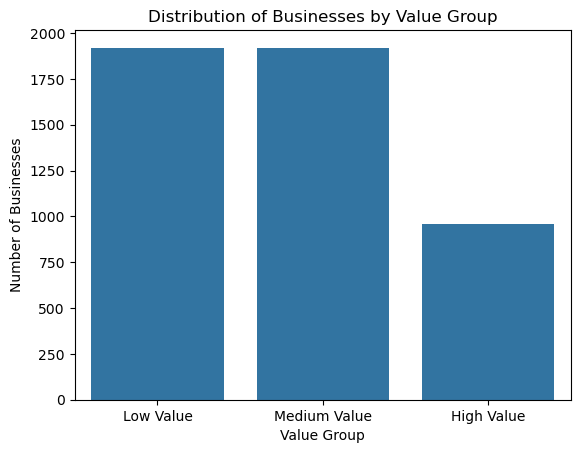

In [129]:
# plotting a bar chart to display the number of businesses in each group
sns.countplot(x='VALUE_GROUP', data=business_summary)
plt.title('Distribution of Businesses by Value Group')
plt.xlabel('Value Group')
plt.ylabel('Number of Businesses')
plt.show()

Shows the distribution of businesses across High, Medium and Low Value groups

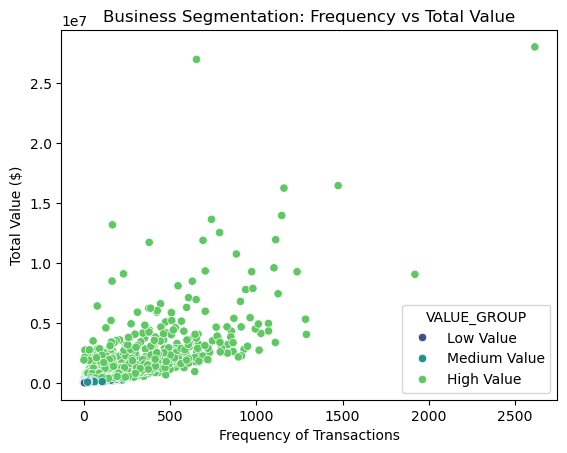

In [131]:
# Scatter plot: TOTAL_VALUE vs FREQUENCY
sns.scatterplot(
    x='FREQUENCY', y='TOTAL_VALUE', hue='VALUE_GROUP',
    data=business_summary, palette='viridis'
)
plt.title('Business Segmentation: Frequency vs Total Value')
plt.xlabel('Frequency of Transactions')
plt.ylabel('Total Value ($)')
plt.show()

Highlights the TOTAL_VALUE vs Frequency with color-coded VALUE_GROUP

#### 3.2.1 Providing recommendations for engagement with each group.
Businesses can be categorized into High Value, Medium Value, and Low Value groups based on their purchasing behavior. Tailored engagement strategies should be developed for each group to maximize their potential.

High Value Businesses are frequent customers with substantial purchasing volumes and values, driving significant revenue. Personalized attention through dedicated account managers, exclusive offers, loyalty programs, regular communication, and upselling/cross-selling opportunities are recommended to strengthen relationships and maintain their loyalty.

Medium Value Businesses have moderate purchasing volumes and values, with consistent but less frequent transactions. They represent potential for growth into high-value customers. Targeted campaigns, customer education, upsell opportunities, and feedback collection can encourage higher spending or more frequent transactions.

Low Value Businesses have low purchasing volumes and values, with infrequent transactions. They may be new, inactive, or less interested in your offerings. Reactivation campaigns, awareness building, simplified offerings, and performance monitoring can help identify potential for growth or reallocate resources to other segments.

### 3.3 Forecasting: Using the provided data, forecast the total sales (Value) for the next 3 months. Use an appropriate time-series forecasting method (e.g., ARIMA, moving average, or exponential smoothing).

We will use the ARIMA (AutoRegressive Interated Moving Average) model to forecast the total sales (Value) for the nest 3 months.

#### 3.3.1 Data Preparation
Before we apply ARIMA, we will ensure that the data is prepared properly.

In [137]:
# Aggregating sales (Value) by Month-Year
monthly_sales = clean_data.groupby('Month-Year')['Total Value'].sum().reset_index()

# Converting Month-Year to datetime and set as index
monthly_sales['Month-Year'] = pd.to_datetime(monthly_sales['Month-Year'], format= "%B %Y")
monthly_sales.set_index('Month-Year', inplace=True)

# Ensuring the data is sorted by time
monthly_sales = monthly_sales.sort_index()

#### 3.3.2 Check for stationary
Arima requires the time series to be stationary (constant mean and variance over time). We will use the Augmented Dickey-Fuller (ADF) test to check for stationary

In [139]:
from statsmodels.tsa.stattools import adfuller

# Performing ADF test
result = adfuller(monthly_sales['Total Value'])
print(f'ADF Statistic: {result[0]}')
print(f'p-value: {result[1]}')

ADF Statistic: -2.6781287719843148
p-value: 0.07790001378154882


The p-value > 0.05. This means that the series is non-stationary and needs differencing

#### 3.3.3 Differencing

In [142]:
# Apply first-order differencing
monthly_sales['DIFFERENCED'] = monthly_sales['Total Value'].diff()

# Drop NaN values after differencing
monthly_sales.dropna(inplace=True)

#### 3.3.4 Fitting the ARIMA model
We will use the Auto-ARIMA function to automatically select the best parameters.


In [144]:
# installing pmdarima
!pip install pmdarima

In [145]:
# importing auto_arima
from pmdarima import auto_arima

# Automatically determine the best ARIMA parameters
auto_model = auto_arima(
    monthly_sales['Total Value'],
    seasonal=False,  # Set to True if seasonality is present
    trace=True,
    error_action='ignore',
    suppress_warnings=True
)

# Print the best parameters
print(auto_model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=0.98 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=446.784, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=418.676, Time=0.02 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=442.002, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=419.580, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0]             : AIC=417.892, Time=0.04 sec
 ARIMA(2,0,1)(0,0,0)[0]             : AIC=inf, Time=0.09 sec
 ARIMA(1,0,2)(0,0,0)[0]             : AIC=419.317, Time=0.04 sec
 ARIMA(0,0,2)(0,0,0)[0]             : AIC=445.626, Time=0.02 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=413.269, Time=0.03 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=413.427, Time=0.01 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=411.010, Time=0.02 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=408.996, Time=0.01 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 1.465 seconds
                               SARIMAX Resu

The parameters have been defined, therefore we move to the next step; fitting the model.

In [147]:
from statsmodels.tsa.arima.model import ARIMA

# Fitting the ARIMA model with the best parameters
model = ARIMA(monthly_sales['Total Value'], order=auto_model.order)
arima_result = model.fit()

# Print model summary
print(arima_result.summary())

                               SARIMAX Results                                
Dep. Variable:            Total Value   No. Observations:                   11
Model:                          ARIMA   Log Likelihood                -210.687
Date:                Thu, 30 Jan 2025   AIC                            425.373
Time:                        16:59:16   BIC                            426.169
Sample:                    02-01-2024   HQIC                           424.871
                         - 12-01-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.439e+08   7.93e+07      1.815      0.070   -1.15e+07    2.99e+08
sigma2      6.291e+15      0.030   2.07e+17      0.000    6.29e+15    6.29e+15
Ljung-Box (L1) (Q):                   0.00   Jarque-

C:\Users\Dynoh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dynoh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Dynoh\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


#### 3.3.5 Forecast the Next 3 Months

In [149]:
# Forecast the next 3 months
forecast = arima_result.get_forecast(steps=3)
forecast_values = forecast.predicted_mean
forecast_conf_int = forecast.conf_int()

In [150]:
# Print forecasted values and confidence intervals
print("Forecasted Sales for Next 3 Months:")
print(forecast_values)

Forecasted Sales for Next 3 Months:
2025-01-01    1.439407e+08
2025-02-01    1.439407e+08
2025-03-01    1.439407e+08
Freq: MS, Name: predicted_mean, dtype: float64


In [151]:
# print confidence intervals
print("Confidence Intervals:")
print(forecast_conf_int)

Confidence Intervals:
            lower Total Value  upper Total Value
2025-01-01      -1.151224e+07       2.993937e+08
2025-02-01      -1.151224e+07       2.993937e+08
2025-03-01      -1.151224e+07       2.993937e+08


#### 3.3.6 Visualising the forecast

C:\Users\Dynoh\AppData\Local\Temp\ipykernel_15316\4200127954.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=4, freq='M')[1:]


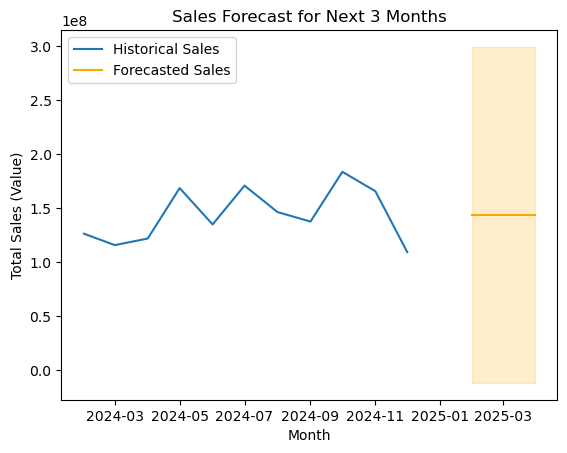

In [153]:
# Ploting the historical data
plt.plot(monthly_sales.index, monthly_sales['Total Value'], label='Historical Sales')

# Plotting the forecasted values
forecast_index = pd.date_range(start=monthly_sales.index[-1], periods=4, freq='M')[1:]
plt.plot(forecast_index, forecast_values, label='Forecasted Sales', color='orange')

# Plotting the confidence intervals
plt.fill_between(forecast_index, 
                 forecast_conf_int.iloc[:, 0], 
                 forecast_conf_int.iloc[:, 1], 
                 color='orange', alpha=0.2)

plt.title('Sales Forecast for Next 3 Months')
plt.xlabel('Month')
plt.ylabel('Total Sales (Value)')
plt.legend()
plt.show()

#### 3.3.7 Recommendations
The sales projections indicate a steady outlook. It's advisable to continue with the existing strategies while remaining vigilant for any unforeseen fluctuations that may necessitate adjustments.

#### 3.3.8 Why ARIMA?
ARIMA is a popular statistical technique for analyzing and forecasting time series data. It considers patterns like trends, seasonal fluctuations, and correlations between observations over time. ARIMA's versatility makes it a go-to choice across various industries for predicting future values based on historical data. In this case, it offers a reliable 3-month forecast, supporting informed decision-making processes.

### 3.4 Anomaly Detection:Identify any unusual spikes or drops in sales performance (Quantity or Value) and explain possible reasons based on the data.
We use anomaly detection techniques on time-series data to identify unusual spikes or drops in sales peformance (Quantity or Value).
#### 3.4.1 What is Anomaly Detection?
Anomaly detection refers to identifying data points that deviate significantly from the rest of the dataset. These anomalies could indicate unusual events, errors, or significant changes in behavior.
In the context of sales performance:
- Spikes: Sudden increases in sales (Quantity or Value) that are significantly higher than the norm.
- Drops: Sudden decreases in sales that are significantly lower than the norm.


#### 3.4.2 Steps to Detect Anomalies in Sales Data
##### 3.4.2.1 Aggregating the Data

In [158]:
# Aggregate sales data by date to create a time series
sales_data = clean_data.groupby('DATE').agg(TOTAL_QUANTITY=('QUANTITY', 'sum'),
                                            TOTAL_VALUE=('Total Value', 'sum')).reset_index()

##### 3.4.2.2 Visualising the Data
Plotting the time series to visually inspect for any spikes or drops

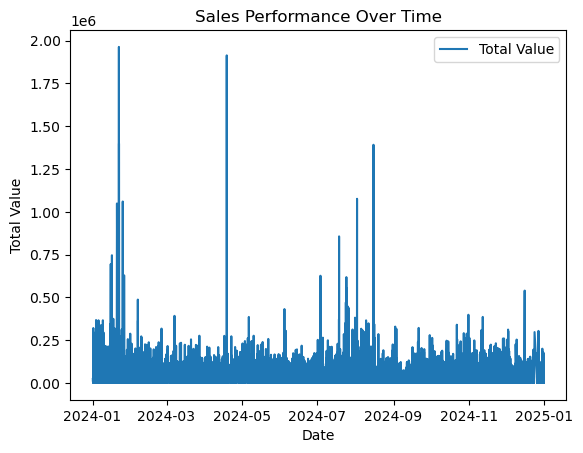

In [160]:
# Plot Total Value over time
plt.plot(sales_data['DATE'], sales_data['TOTAL_VALUE'], label='Total Value')
plt.title('Sales Performance Over Time')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()
plt.show()

##### 3.4.2.3 Applying Anomaly Detection Techniques
We will use machine learning-based anomaly detection methods to identify unusual patterns

In [162]:
#  we will use a machine learning model called Isolation Forest to detect the anomalies
from sklearn.ensemble import IsolationForest

# Fittig the Isolation Forest model
model = IsolationForest(contamination=0.05, random_state=42)
sales_data['ANOMALY'] = model.fit_predict(sales_data[['TOTAL_VALUE']])

# Anomalies are marked as -1
sales_data['ANOMALY'] = sales_data['ANOMALY'].apply(lambda x: 'Anomaly' if x == -1 else 'Normal')
print(sales_data.sample(n=20))

                     DATE  TOTAL_QUANTITY  TOTAL_VALUE  ANOMALY
58916 2024-09-02 10:01:00               1       1505.0   Normal
24957 2024-04-20 20:00:00               6      17740.0   Normal
19179 2024-03-25 11:02:00               3       7000.0   Normal
42398 2024-06-25 15:58:00               8      19110.0   Normal
39656 2024-06-14 23:03:00              11      30325.0   Normal
29553 2024-05-10 11:03:00               1       6240.0   Normal
55644 2024-08-21 21:00:00               2       3810.0   Normal
85769 2024-11-19 17:37:00               1       4860.0   Normal
55557 2024-08-21 18:50:00               5       9220.0   Normal
52802 2024-08-07 20:30:00               4      15480.0   Normal
75751 2024-10-22 07:34:00               5       6730.0   Normal
28296 2024-05-06 12:59:00               2       8200.0   Normal
65736 2024-09-23 14:53:00              46     103915.0  Anomaly
69406 2024-10-03 17:27:00               6       9560.0   Normal
82809 2024-11-10 18:06:00               

#### 3.4.3 Analyze the Anolamies

Once irregularities emerge, we will scrutinize the specific dates and figures to comprehend the essence of the spikes or drops. A sudden rise in total value or quantity could stem from promotions, discounts, bulk purchases, or the launch of a popular new product that has gained traction. Conversely, a sudden drop could result from seasonality, supply chain disruptions, or heightened market competition leading to customer attrition. By delving into the underlying causes, we can formulate appropriate strategies to capitalize on positive trends or mitigate adverse impacts.

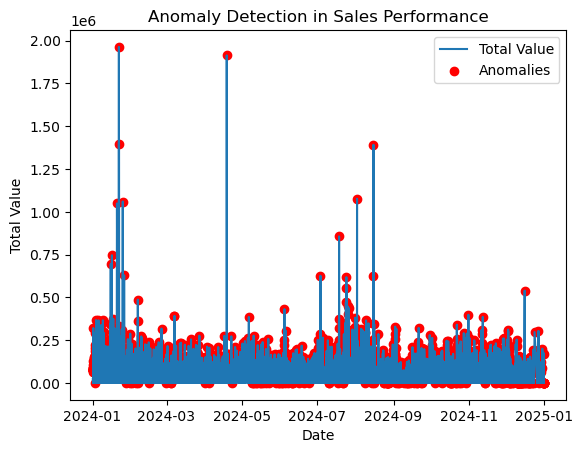

In [165]:
# Plot anomalies
plt.plot(sales_data['DATE'], sales_data['TOTAL_VALUE'], label='Total Value')
plt.scatter(
    sales_data[sales_data['ANOMALY'] == 'Anomaly']['DATE'],
    sales_data[sales_data['ANOMALY'] == 'Anomaly']['TOTAL_VALUE'],
    color='red', label='Anomalies'
)
plt.title('Anomaly Detection in Sales Performance')
plt.xlabel('Date')
plt.ylabel('Total Value')
plt.legend()
plt.show()

#### 3.4.4 Recommendations for Addressing Sales Anomalies
Identifying unusual patterns in sales data can provide valuable insights for businesses. When sales spike unexpectedly, it's crucial to investigate the reason, whether it's a successful promotion or an unexpected bulk order. If the spike resulted from a successful campaign, consider replicating it in the future. Additionally, ensure sufficient inventory to handle similar spikes. On the other hand, if sales drop significantly, identify the root cause, such as seasonality, competition, or supply chain issues. Implement strategies to mitigate the impact, like targeted promotions or improving product availability. Update sales forecasts to account for the anomaly and plan resources accordingly. Analyzing anomalies in sales performance enables businesses to uncover valuable insights, such as the impact of promotions, seasonality, or operational issues, and make data-driven decisions to optimize performance.

#### 3.4.5 Conclusion
Identifying unusual patterns in sales data through anomaly detection allows companies to take proactive steps. By analyzing these anomalies, businesses can gain valuable insights, such as understanding the effects of promotions, seasonal trends, or operational challenges, and make informed decisions to improve performance.

### 3.5 Correlation Analysis:Examining relationships between Quantity and Value.

#### 3.5.1 Correlation Analysis
examines the relationship between two variables, in this case, the number of units sold (Quantity) and the total sales revenue (Value). The correlation coefficient, represented by r, ranges from -1 to 1, indicating the strength and direction of the relationship: 
- r > 0: Positive correlation (as one variable increases, the other also increases).
- r < 0: Negative correlation (as one variable increases, the other decreases).
- r = 0: No correlation (no relationship between the variables).

In [170]:
# Calculate correlation coefficient
correlation = clean_data['QUANTITY'].corr(clean_data['Total Value'])
print(f"Correlation Coefficient (r): {correlation}")

Correlation Coefficient (r): 0.835333044972704


r is close to 1, this means that there is a strong correlation; higher quantities sold are strongly associated with higher sales value. This indicates Quantity is a major driver of Value. This is expected in most sales scenarios because:
- Higher quantities sold directly contribute to higher revenue.
- Bulk purchases or high-demand products often result in spikes in both Quantity and Value. 

#### 3.5.2 Providing insights into which factors drive sales performance.

##### 3.5.2.1 Factors Influencing Sales Performance
Correlation analysis can shed light on the key elements that contribute to sales success. Several potential drivers emerge when examining the relationship between Quantity and Value:
1. Factor 1: Product Pricing Strategy
- Higher-priced offerings tend to generate more revenue, even if their quantities are lower.
Discounts or promotions may boost Quantity but could diminish Value if the price reduction is substantial.
2. Factor 2: Customer Segmentation
- High-value clients, such as businesses making bulk purchases, often drive both Quantity and Value.
Low-value customers typically purchase smaller quantities, contributing less to overall sales.
3. Factor 3: Seasonal Trends
- Certain periods, like holidays or end-of-quarter sales, may experience spikes in both Quantity and Value due to increased demand.
4. Factor 4: Marketing Campaigns
- Promotions, advertisements, and targeted campaigns can stimulate higher sales volumes, impacting both Quantity and Value positively.

#### 3.5.3 Recommendations
Based on the correlation analysis and identified factors, here are some actionable recommendations:
- Focus on High-Value Products:
Identify products with high unit prices and strong demand. Promote these products to maximize Value.
- Leverage Bulk Purchases:
Encourage bulk purchases through discounts or incentives for high-quantity orders.
- Monitor Pricing Strategies:
Analyze the impact of price changes on both Quantity and Value. Ensure that discounts drive sufficient volume to offset revenue losses.
- Target High-Value Customers:
Use customer segmentation to identify and prioritize high-value customers who contribute significantly to both Quantity and Value.
- Seasonal Planning:
Prepare for seasonal spikes by ensuring sufficient inventory and targeted marketing campaigns.


#### 3.5.4 Conclusion
Correlation analysis examines the connection between sales volume and revenue, providing businesses with valuable insights into factors driving their sales performance. A robust positive correlation indicates that increasing the quantity of products sold is crucial for boosting overall revenue. However, a weaker correlation suggests that other elements, such as pricing strategies, product mix, and customer preferences, play a more significant role. By carefully analyzing these correlations, businesses can refine their approaches and implement strategies tailored to maximizing their sales performance effectively.

## Section 4: Strategic Insights and Recommendations

### 4.1 Product Strategy: Based on your analysis, recommend one product category to prioritize for marketing campaigns. Justify your choice using the data.

#### 4.1.1 Recommended Product Category for Marketing Campaigns
The analysis suggests prioritizing the High-Value Product Category for marketing campaigns. These products contribute significantly to total sales value despite moderate quantities sold, due to higher unit prices or consistent demand. 

#### 4.1.2 Justification for Prioritizing High-Value Products
Focusing on this category offers several advantages:

1. High-value products account for a disproportionate share of revenue. If a category contributes 30% of sales value but only 10% of quantity sold, it indicates higher price points and key revenue drivers. Targeting customers willing to pay for premium offerings can maximize ROI.

2. High-value products are often purchased by businesses or affluent individuals who are less price-sensitive, have higher lifetime value, and are more receptive to personalized marketing. Targeting this segment can build stronger relationships and encourage repeat purchases.

3. High-value products present opportunities for cross-selling or upselling complementary products, accessories, or premium services, increasing average order value.

4. A data-driven approach optimizes resource allocation to the most profitable categories, reducing manual efforts and improving efficiency.

5. Promoting high-value products can differentiate your brand by showcasing unique features and benefits, attracting customers who prioritize quality and exclusivity, crucial in both B2B and B2C environments.

#### 4.1.3 Marketing Campaign Recommendations
To effectively promote high-value products, consider personalized campaigns with tailored messages and customer testimonials, exclusive offers and loyalty rewards, content marketing focused on storytelling, targeted advertising based on customer data, and bundling or upselling strategies.

#### 4.1.4 Conclusion
Concentrating your marketing efforts on the High-Value Product Category is a strategic choice that aligns with revenue optimization and customer segmentation insights. By utilizing data-driven marketing techniques and highlighting the unique advantages of these products, you can maximize your return on investment and solidify your competitive edge in the market.

### 4.2 Customer Retention: Identify businesses that have reduced their purchase frequency over time. 

#### 4.2.1 Identifying businesses that have reduced purchase frequency

from 3.2 above, the Low Value Segmented business have reduced purchase frequency as shown in the table below

In [183]:
business_summary

,ANONYMIZED BUSINESS,TOTAL_QUANTITY,TOTAL_VALUE,FREQUENCY,CLUSTER,VALUE_GROUP
0,Business-0000,8,10445.0,8,0,Low Value
1,Business-0005,1,2645.0,1,0,Low Value
2,Business-0029,26,77340.0,6,0,Medium Value
3,Business-003d,98,221761.0,31,0,Medium Value
4,Business-0072,127,225056.0,101,0,Medium Value
...,...,...,...,...,...,...
4795,Business-ffa9,3,6740.0,3,0,Low Value
4796,Business-ffae,6,10530.0,5,0,Low Value
4797,Business-ffb1,266,438115.0,105,0,High Value
4798,Business-ffd2,37,67723.0,22,0,Medium Value


#### 4.2.2 Strategies to re-engage these customers

1. Engage customers with tailored messages addressing their specific needs or past purchases.
2. Reactivate interest by highlighting new products, services, or updates.
3. Offer exclusive discounts and loyalty rewards to encourage repeat purchases.
4. Understand why customers reduced their purchases through feedback surveys or direct communication.
5. Resolve any issues related to product quality, delivery, or customer support.
6. Create a sense of urgency with time-sensitive promotions and seasonal campaigns.
7. Introduce exclusive membership programs with unique benefits like early access, special pricing, or VIP support.
8. Share educational content, blogs, webinars, or case studies demonstrating how your products solve problems.
9. Inform customers about new features or improvements.
10. Optimize communication frequency to avoid overwhelming customers, and send reminders or follow-ups based on customer activity.
11. Reconnect through a mix of email, social media, and direct calls to re-establish contact with dormant customers.

### 4.3 Operational Efficiency:Suggest improvements to inventory management or supply chain processes based on trends in product performance and seasonal demand.

Operational efficiency improvements through optimized inventory management and streamlined supply chain processes can significantly enhance business performance. By leveraging data-driven insights and adopting best practices, companies can align stock levels with demand patterns, minimize costs, and ensure timely order fulfillment.

Implementing demand planning tools and inventory segmentation strategies can help forecast seasonal trends accurately. Coupled with real-time stock tracking and automated reordering, businesses can maintain optimal inventory levels, avoiding overstocking or stockouts. Effective management of seasonal products, including pre-season stocking and post-season clearance strategies, is crucial for minimizing waste and storage costs.

Investing in supply chain technology, such as visibility tools and AI-driven analytics, can improve responsiveness and mitigate disruptions. Building strong supplier relationships through collaborative contracts and a diversified network can ensure reliable material sourcing. Adopting agile practices and demand sensing techniques can enhance the ability to adapt to sudden demand fluctuations.

Optimizing logistics and distribution through route planning software, regional distribution centers, and partnerships with third-party logistics providers can reduce transportation costs and improve delivery times. Prioritizing high-performing products and addressing underperforming inventory through clearance strategies can further enhance operational efficiency.

By aligning inventory and supply chain processes with product performance and seasonal demand patterns, businesses can achieve significant improvements in operational efficiency, cost reduction, and customer satisfaction, ultimately driving profitability and competitiveness.

## Section 5: Dashboard and Reporting

In [189]:
# We will export the important files to create a dashboard using PowerBI
clean_data.to_excel('clean_data.xlsx')
business_summary.to_excel('business_summary.xlsx')
print('Both excel sheets have been created successfully.')

Both excel sheets have been created successfully.


## Bonus Section: Open-Ended Problem

### Predictive Analysis: Identify external factors that could influence sales (e.g., economic conditions, competitor actions). Propose a methodology to incorporate such factors into future analyses

Predictive analysis plays a crucial role in understanding external factors that influence sales performance. While businesses have limited control over these external factors, incorporating them into forecasting models can significantly improve accuracy. Key external factors include economic conditions, competitor actions, industry trends, demographic and geographic changes, seasonality and weather patterns, and global events. To effectively integrate these factors, a structured methodology is proposed. First, collect internal data like historical sales and external data from government reports and industry publications. Next, convert external factors into quantifiable variables and include lagged versions to account for delayed effects. Choose appropriate predictive models, such as regression analysis, time series analysis, or machine learning techniques, to capture the relationships between external factors and sales. Train and validate these models using historical data, ensuring external factors are included as independent variables. Conduct scenario analysis to simulate the impact of changes in external factors and develop risk mitigation strategies. Finally, continuously monitor and update the models with real-time data to maintain accuracy and adapt to changing market conditions. By following this approach, businesses can proactively address external challenges and capitalize on emerging opportunities, ultimately driving sustainable growth and success.

### Scalability: If the dataset were 10 times larger, what optimizations would you implement for data storage, processing, and analysis?

Scalability is a crucial aspect when dealing with growing datasets, as it ensures efficient data storage, processing, and analysis. If the dataset were to increase tenfold, significant optimizations would be necessary to maintain system performance. Here are the recommended strategies for scaling each component:

1. Data Storage Optimizations: Migrate to scalable cloud storage solutions like AWS S3, Google Cloud Storage, or Azure Blob Storage, which offer virtually unlimited capacity and automatic scaling. Implement distributed file systems like Hadoop Distributed File System (HDFS) or Apache Cassandra for on-premises solutions. Partition data based on logical keys, compress it using formats like Parquet or ORC, and archive older data to cold storage.

2. Data Processing Optimizations: Utilize distributed computing frameworks like Apache Spark or Apache Flink for parallel processing. Employ batch processing for historical analysis and stream processing for real-time data. Optimize query performance through indexing, caching, and materialized views. Parallelize tasks to leverage multi-core processors or distributed systems.

3. Data Analysis Optimizations: Leverage scalable machine learning frameworks like TensorFlow, PyTorch, or MLlib for distributed training and inference. Automate feature engineering using tools like Feature Store or frameworks like TFX (TensorFlow Extended). Perform incremental analysis updates instead of reprocessing the entire dataset. Use scalable visualization tools like Tableau, Power BI, or Apache Superset, and aggregate data before visualization.

4. Infrastructure Optimizations: Adopt cloud-based infrastructure with auto-scaling capabilities and serverless computing services. Utilize containerization tools like Docker and orchestration platforms like Kubernetes for efficient workload management. Monitor resource utilization and optimize configurations for distributed systems.

5. Methodology for Scaling: Assess current bottlenecks, transition to a distributed architecture, automate scaling using cloud-native tools, and continuously monitor and refine system configurations for optimal performance and cost efficiency.

Scaling a dataset tenfold requires a comprehensive approach involving cloud-based storage, distributed processing frameworks, optimized analysis techniques, and efficient infrastructure management. By leveraging scalable technologies and implementing data partitioning, compression, caching, and automation strategies, organizations can handle massive datasets while maintaining performance and cost-effectiveness.